### 背景
分析全球和自己所在地的气温数据，比较所在城市的气温走向与全球气温走向。

### 数据获取
从数据库中提取数据。通过[Udacity](https://classroom.udacity.com/nanodegrees/nd002-cn-basic-vip/parts/d1865612-f3fd-4db0-80c7-348c594d573d/modules/7b83f9fd-759a-4cc6-8456-ce3783e17475/lessons/dce89631-d141-4a36-b3fd-5e8ec038bc70/concepts/530f21c0-2f37-4390-aaab-3ce440e56d80)提供的工作区，该工作区与数据库连接。

####  方法一
写入以下SQL语句，导出世界气温数据以及最接近自己居住地的大城市气温数据。

1. 首先查看`city_list`表，`country`列等于`China`的城市有哪些;

2. 然后将离自己所在城市`长沙`最近的城市`武汉`市的数据提取出来;

3. 最后再将全球气温数据提取出来。

select * from city_list where country='China';

select * from city_data where city='Wuhan';

select * from global_data;


#### 方法二
或者通过以下SQL命令，一次性将两个数据都提取到一个表格：

select c.year, c.avg_temp as city_temp, g.avg_temp as global_temp

from city_data c, global_data g

where c.year = g.year

and c.city = 'Wuhan';

### 可视化
使用Python将提取的数据（**这里的数据是采用方法一提取的**）可视化成一个线条图，便于武汉市和全球气温比较。

#### 说明
1. 绘制图使用`matplotlib.pyplot`模块；移动平均值计算需使用`pandas`库；设置坐标轴的ticks需用到`matplotlib.ticker`模块；matplotlib绘图可视化的各属性设置可参考[这里](http://python.jobbole.com/85106/)


2. 为了使绘制的线图更加平滑，便于观察气温走向，所以采用气温的移动平均值，而不是原始的年平均值。因而需要先计算移动平均值----->函数`calculate_moving_average()`

   1）移动平均值的计算方法这里采用[pandas.rolling_mean](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.rolling_mean.html)函数。但是，按照文档说明传入参数后，会报出`AttributeError: module 'pandas' has no attribute 'rolling_mean'
`错误，后来发现是`pandas`库的版本问题，具体解决方案可参考[这里](https://stackoverflow.com/questions/50482884/module-pandas-has-no-attribute-rolling-mean)。

   2）移动平均值窗口大小的设定需要权衡考虑。设置得过小，起不到平滑的作用，波动仍然会很剧烈；设置得过大，数据越平滑，但是准确性和敏感性就降低的越多。所以需要在数据变化准确性和平滑程度之间进行一个权衡，既想要观察到更多局部的波动，又想要观察长远趋势，10年左右是比较好的选择。


3. 有了移动均值后，就可以开始绘制图形了----->函数`show_fig()`

   1）绘制图形时需要考虑所在城市的数据范围是否与全球气温数据的范围一致。武汉市的数据是从1841年到2013年，而全球气温数据是从1750年到2015年，所以要将城市数据和全球数据处理成在相同时间段内，才能正确比较趋势。
   
   *注：只有当采用方法一获取数据时才需考虑第一点*
  
   2）需要考虑如何设置图形坐标轴的刻度尺大小，使得图形大小更为合适，便于查看和比较本地城市和全球的气温。

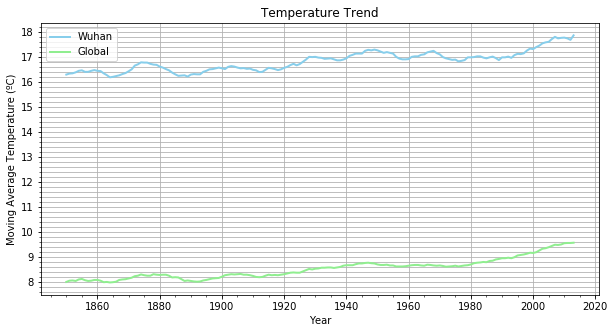

In [7]:
"""分析所在城市和全球的气温趋势
"""
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline



def calculate_moving_average(row_data,window):
    """计算移动平均值
       参数1：需要计算移动平均值的csv文件
       参数2：移动窗口大小
    """
    data = pd.read_csv(row_data)
    data['mavg_temp'] = round(data['avg_temp'].rolling(window).mean(),2)
    return data

def show_fig(city_data,global_data):
    """将所在城市与全球平均气温数据绘制成折线图并展示
       参数1：城市平均气温数据
       参数2：全球平均气温数据
    """
    #设置显示的图片大小
    figsize = 10,5 
    figure, ax = plt.subplots(figsize=figsize) 
    
    #X,Y轴的标签
    plt.xlabel('Year')
    plt.ylabel('Moving Average Temperature (ºC)')

    xmajorLocator   = MultipleLocator(20) #将x轴主刻度标签设置为20的倍数
    xminorLocator   = MultipleLocator(5) #将x轴次刻度标签设置为5的倍数
    ax.xaxis.set_major_locator(xmajorLocator)
    ax.xaxis.set_minor_locator(xminorLocator)


    ymajorLocator   = MultipleLocator(1) #将y轴主刻度标签设置为1的倍数
    yminorLocator   = MultipleLocator(0.2) #将y轴次刻度标签设置为0.2的倍数
    ax.yaxis.set_major_locator(ymajorLocator)
    ax.yaxis.set_minor_locator(yminorLocator)
    
    ax.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
    ax.yaxis.grid(True, which='minor') #y坐标轴的网格使用次刻度


    plt.plot(city_data['year'],city_data['mavg_temp'],color='skyblue',linewidth='2',label='Wuhan')
    plt.plot(global_data['year'],global_data['mavg_temp'],color='lightgreen',linewidth='2',label='Global')
    plt.legend()
    plt.title('Temperature Trend')

    plt.show() 

city_data_file = 'data/avg_temp_wuhan_data.csv'
global_data_file = 'data/avg_temp_global_data.csv'
window = 10
city_data = calculate_moving_average(city_data_file,window)
global_data = calculate_moving_average(global_data_file,window)
# print(city_data)
# print(global_data)

# print(city_data[9:])
city_data = city_data[9:] #计算移动均值后，武汉市数据表前9行没有数据，从1850年起-2013年，共164行，有平均气温数据
# print(global_data[100:-2])
global_data = global_data[100:-2] #故为了正确比较，全球平均气温数据也只取第100行(1850年)到倒数第二行(2013年)之间的164行数据

show_fig(city_data,global_data)




### 问题与观察结论

#### Q1 
全球气温的整体趋势是怎么样的？本地城市呢？

从上图中可以看到整体上，从1841年起到2015年之间的70多年间，全球和武汉市的平均气温都是呈上升趋势。世界是真的越来越热了，经过这70多年，全球平均气温上升了1.6度左右，而武汉市上升了1.8度左右。武汉市比全球气温上涨幅度略大。

#### Q2 
与全球平均气温相比，本地城市平均气温比较热还是比较冷？长期气温差异是否一致？

可以很明显的看到，武汉市比全球更热，其平均气温比全球平均气温高出8度左右。不愧是中国的“四大火炉城市”之一呀！1841年的时候，武汉的平均气温是16.2度，比全球平均气温8度，高出8.2度，到了近几年，武汉市的平均气温升到18度，达到最高峰值，比全球平均气温最高峰值9.6度，高出8.4度。这说明，长期来看，武汉市和全球的气温差异是一致的。

#### Q3 
在这几十年间，全球的气温波动如何？本地城市呢？

全球的气温几乎是呈平稳上升趋势，但是到了最近几年，尤其是1980年之后，气温增长得越来越快，图形呈负偏斜分布；而武汉市的气温虽然整体上是上升的趋势，但是趋势波动很大，某个时间段内气温下降，之后再上升，图形呈多峰分布。

#### Q4 
哪个时间段内，武汉市与全球气温趋势的趋势最为相似？

通过图可以观察到1860年-1885年这25年间，武汉市与全球气温趋势最为相近。在这25年，武汉和全球气温都两次达到气温最低峰值。第一次出现在1862年左右，第二次出现在1885年，武汉市大概为15.8度，全球气温大概为7.8度。不知道在这个两个时间点发生了什么，温度出现了下降现象，但在1885年之后，无论是武汉还是全球，尽管气温有波动，但都没有再降到最低峰值。